## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
metadataDF = pd.read_csv(mouse_metadata_path)
resultsDF = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedDF = pd.merge(left = metadataDF, right = resultsDF, left_on = "Mouse ID", right_on ="Mouse ID")
mergedDF.to_csv('data/output.csv', index = False)

# Display the data table for preview
mergedDF.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mergedDF['Mouse ID'].nunique(), mergedDF['Mouse ID'].count()
# Should be 249 uniques and 1893 total

(249, 1893)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mergedDF[mergedDF.duplicated()]
duplicates['Mouse ID']
# g989 is the duplicate mouse causing issues

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeMouse = mergedDF[mergedDF['Mouse ID'] == 'g989'].index
mergedDF.loc[mergedDF['Mouse ID'] == 'g989']

# g989 has 13 rows.  All will be dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergedDF.drop(dupeMouse, inplace = True)
mergedDF

# g989 has been dropped, and the correct number of rows are in the frame  1893 - 13 = 1880

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mergedDF['Mouse ID'].nunique(), mergedDF['Mouse ID'].count()

# G989 has been dropped and there is 1 fewer mouse and 13 fewer rows 248/1880 vs 249/1893 

(248, 1880)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summaryStats = pd.DataFrame(mergedDF.groupby("Drug Regimen").count())

summaryStats["Mean"] = pd.DataFrame(mergedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summaryStats["Median"] = pd.DataFrame(mergedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summaryStats["Standard Deviation"] = pd.DataFrame(mergedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summaryStats["Variance"] = pd.DataFrame(mergedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summaryStats["SEM"] = pd.DataFrame(mergedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summaryStats = summaryStats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summaryStats = summaryStats.rename(columns = {"Mouse ID" : "Completed Trials"})

summaryStats.head()

,Completed Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

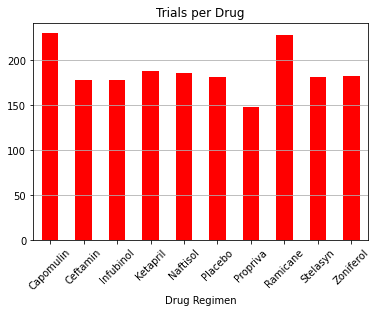

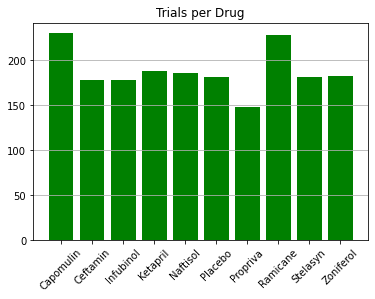

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugData = summaryStats[['Completed Trials']]
drugData.plot(kind='bar', color='r', legend=False)
plt.title('Trials per Drug')
plt.xticks(rotation=45)

# Add in some horizontal grid lines, not sure how to make them print to background
axes = plt.gca()
axes.yaxis.grid()
plt.show()


# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Using drugData from above, no point in reinventing wheel
xAxis = np.arange(len(drugData))
xTicks = [value for value in xAxis]
#plt.figure(figsize =(6,6))
plt.bar(xAxis, drugData['Completed Trials'], color = 'g')
plt.xticks(xTicks, drugData.index.values, rotation = 45)
plt.title('Trials per Drug')

# Add in some horizontal grid lines, not sure how to make them print to background
axes = plt.gca()
axes.yaxis.grid()
plt.show()


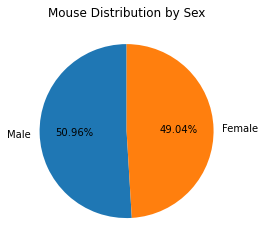

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


sexData = mergedDF['Sex'].value_counts()

# Plot a pie chart   
sexPiePlot = sexData.plot.pie(autopct="%1.2f%%", startangle=90, title='Mouse Distribution by Sex')

# Hide the y label - THis is dumb, it should be automatic in a pie chart
sexPiePlot.set_ylabel('')
plt.show()

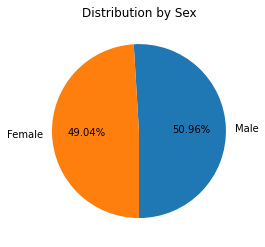

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#same as above, probably didn't need to copy/paste it here.
sexData = mergedDF['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages, I flipped the angle from above for fun.
plt.pie(sexData, labels=sexData.index.values, autopct="%1.2f%%", startangle=270)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepointDF = pd.DataFrame(mergedDF.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
maxTimepointDF



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# crap, i already named a frame mergedDB so this on is going to be timepointMergeDF
timepointMergeDF = pd.merge(mergedDF, maxTimepointDF, on='Mouse ID')
timepointMergeDF.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorSize = []

for drug in drugs:
    drugDF = timepointMergeDF.loc[timepointMergeDF['Drug Regimen'] == drug]
    tumorVolDF = drugDF.loc[drugDF['Timepoint'] == drugDF['Max Timepoint']]
    
    finalTumor = tumorVolDF['Tumor Volume (mm3)']
    tumorSize.append(finalTumor)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = finalTumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print()
    print(f'IQR for {drug}: {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliersCount = (finalTumor.loc[(tumorVolDF['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (tumorVolDF['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of outliers: {outliersCount}')
    



IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of outliers: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of outliers: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of outliers: 0


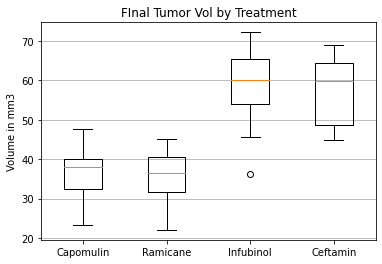

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorSize )
axes = plt.gca()
axes.yaxis.grid()
plt.xticks([1,2,3,4],drugs)
plt.title('FInal Tumor Vol by Treatment')
plt.ylabel('Volume in mm3')
plt.show()

## Line and Scatter Plots

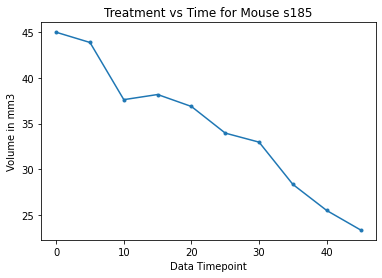

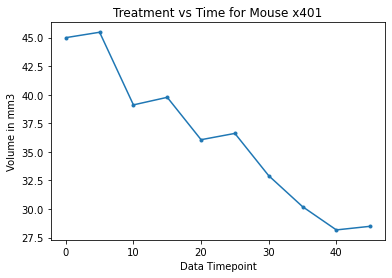

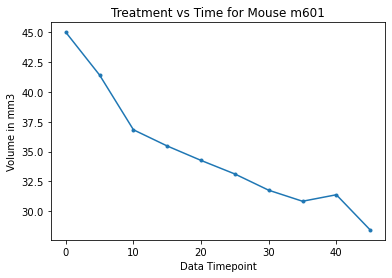

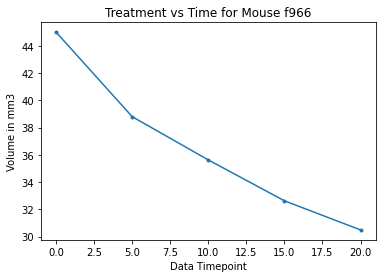

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Assigning a mouseID allows you to plot different mice and have the chart title be correct
# mouseID = 's185'
# mouseID = 'x401'
# mouseID = 'm601'
#mouseID = 'f966'
# I made a loop because I'm fancy  Interesting that 966 only goes to 20
mouseID = ['s185', 'x401', 'm601', 'f966']
for mouse in mouseID:
    deadMouse = mergedDF.loc[mergedDF['Mouse ID'] == mouse]
    plt.plot(deadMouse['Timepoint'], deadMouse['Tumor Volume (mm3)'],marker ='.')
    plt.xlabel('Data Timepoint')
    plt.title(f'Treatment vs Time for Mouse {mouse}')
    plt.ylabel('Volume in mm3')
    plt.show()

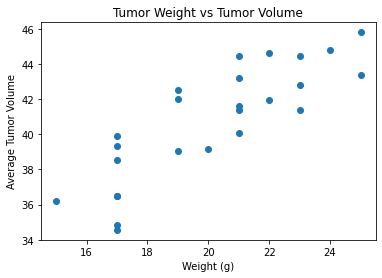

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capoDF = mergedDF.loc[mergedDF['Drug Regimen'] == 'Capomulin']
averageSizeDF = pd.DataFrame(capoDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()\
.rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})
averageSizeDF = pd.merge(capoDF, averageSizeDF, on='Mouse ID')
FinalAveSizeDF = averageSizeDF[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
FinalAveSizeDF
x = FinalAveSizeDF['Weight (g)']
y = FinalAveSizeDF['avg_tumor_vol']

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Tumor Weight vs Tumor Volume')
plt.scatter(x,y)
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#Ran out of time